In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
path = 'student_scores.csv'
df = pd.read_csv(path)
df.head()

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


In [4]:
df.describe()

,Unnamed: 0,NrSiblings,MathScore,ReadingScore,WritingScore
count,30641.000000,29069.000000,30641.000000,30641.000000,30641.000000
mean,499.556607,2.145894,66.558402,69.377533,68.418622
std,288.747894,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,0.000000,10.000000,4.000000
25%,249.000000,1.000000,56.000000,59.000000,58.000000
50%,500.000000,2.000000,67.000000,70.000000,69.000000
75%,750.000000,3.000000,78.000000,80.000000,79.000000
max,999.000000,7.000000,100.000000,100.000000,100.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


In [6]:
df.isnull().sum()

Unnamed: 0                0
Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

In [7]:
# drop unnamed column
df = df.drop('Unnamed: 0', axis= 1)

In [8]:
# data transformation
# change weeklystudy hours column some text 5-Oct change to 5-10 hrs
df["WklyStudyHours"] = df["WklyStudyHours"].str.replace("5-Oct","5-10")

In [9]:
df.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


# Gender distribution

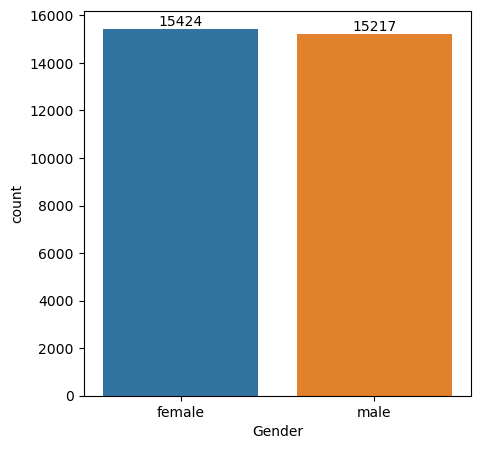

In [30]:

plt.figure(figsize=(5, 5))
ax = sns.countplot(data=df, x = "Gender")
ax.bar_label(ax.containers[0])
plt.show()


In [ ]:
summary
#  Analyze the above chat we have analysed that the number of females in the data is more than number of males

# Parent Education Impact

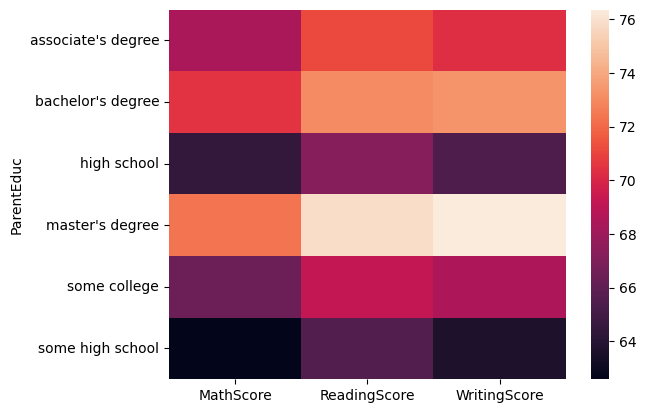

In [25]:
# parent education impac on student score
gb = df.groupby('ParentEduc').agg({"MathScore":"mean", "ReadingScore":"mean","WritingScore":"mean"})
# analytical represantation with heat map
sns.heatmap(gb)
plt.show()
# print(gb)

In [ ]:
# summary
# From above chart we have conclude that the education of the parents have a good impact on there kids score👍

# Marital status of parents impact 

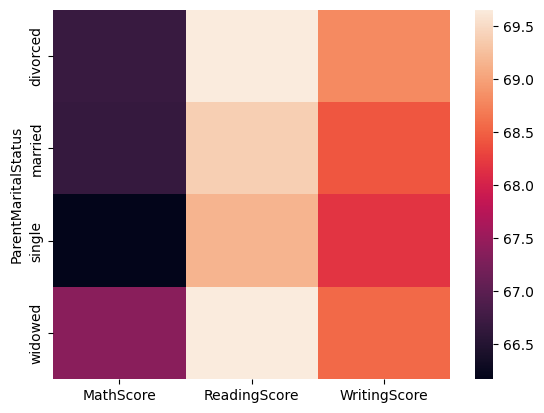

In [27]:
# marital status impact on there kids
marital_status_gb = df.groupby("ParentMaritalStatus").agg({"MathScore":"mean", "ReadingScore":"mean","WritingScore":"mean"})
# print(marital_status_gb)
sns.heatmap(marital_status_gb)
plt.show()

In [ ]:
summary
# There is no something major difference of marital status on there kids

In [37]:
# Assuming df is your DataFrame
df['TotalScore'] = df['MathScore'] + df['ReadingScore'] + df['WritingScore']

# Display the DataFrame with the new column
df.head()

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore,TotalScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74,216
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88,247
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91,271
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42,143
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75,229


# Analyse based on lunch type and weekly study hours

<Axes: xlabel='LunchType', ylabel='TotalScore'>

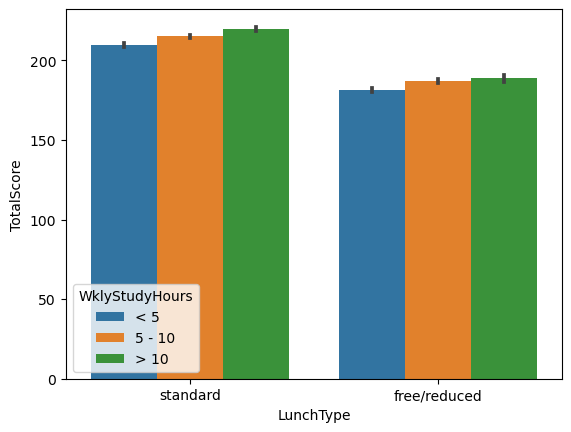

In [46]:
sns.barplot(data = df, x = 'LunchType',y= 'TotalScore',hue='WklyStudyHours')

In [ ]:
summary
# Analysed that the count of weekly study hour more , kids score more on that point.
# And alos analyze Lunch food in varies there score also , standard food type lunch kids doing well score rather than 
# free/reduced lunch type.

<Axes: xlabel='TestPrep', ylabel='TotalScore'>

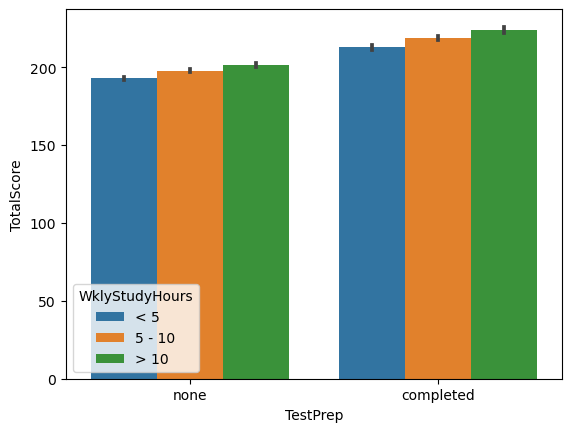

In [47]:
sns.barplot(data = df, x = 'TestPrep',y= 'TotalScore',hue='WklyStudyHours')

# Analyse score betwen testprep completd and non-completed kids

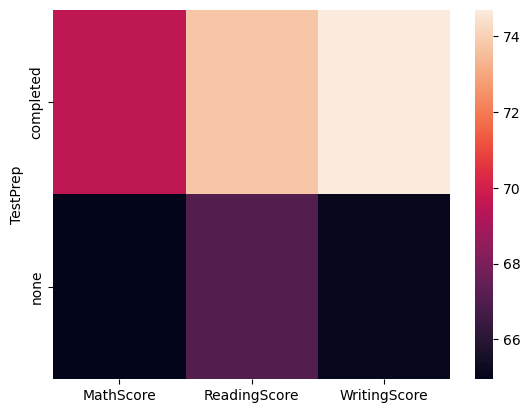

In [48]:
# testprep status completed or not completed impact on kids
tsc = df.groupby("TestPrep").agg({"MathScore":"mean", "ReadingScore":"mean","WritingScore":"mean"})
# print(tsc)
sns.heatmap(tsc)
plt.show()

In [ ]:
summary
# From above chart we have conclude that the test preparation completed of kids have a good impact on there score👍 compare than 
# none completed kids